In [1]:
# Install Required Libraries
!pip install opendatasets --quiet

# Download the Dataset from Kaggle
import opendatasets as od
od.download("https://www.kaggle.com/datasets/gti-upm/leapgestrecog")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mdshahfahadkhan
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog


100%|██████████| 2.13G/2.13G [00:16<00:00, 141MB/s] 


In [2]:
# Import Required Libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


In [3]:
# Load and Preprocess Images
data_dir = "/content/leapgestrecog/leapGestRecog"
image_size = 64
X, y = [], []

for user_folder in os.listdir(data_dir):
    user_path = os.path.join(data_dir, user_folder)
    if not os.path.isdir(user_path): continue

    for gesture_folder in os.listdir(user_path):
        gesture_path = os.path.join(user_path, gesture_folder)
        if not os.path.isdir(gesture_path): continue

        for image_file in os.listdir(gesture_path):
            img_path = os.path.join(gesture_path, image_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (image_size, image_size))
            X.append(img)
            y.append(gesture_folder)

X = np.array(X)
y = np.array(y)

# Normalize and reshape
X = X / 255.0
X = X.reshape(-1, image_size, image_size, 1)

# One-hot encode labels
encoder = LabelBinarizer()
y = encoder.fit_transform(y)


In [4]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [5]:
# Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 81s 314ms/step - accuracy: 0.6267 - loss: 1.1017 - val_accuracy: 0.9965 - val_loss: 0.0219
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 76s 305ms/step - accuracy: 0.9811 - loss: 0.0669 - val_accuracy: 0.9992 - val_loss: 0.0032
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 83s 311ms/step - accuracy: 0.9901 - loss: 0.0369 - val_accuracy: 0.9992 - val_loss: 0.0024
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 83s 315ms/step - accuracy: 0.9940 - loss: 0.0230 - val_accuracy: 1.0000 - val_loss: 5.9514e-04
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 83s 330ms/step - accuracy: 0.9947 - loss: 0.0162 - val_accuracy: 0.9998 - val_loss: 0.0010
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 77s 308ms/step - accuracy: 0.9931 - loss: 0.0199 - val_accuracy: 1.0000 - val_loss: 1.4024e-04
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 329ms/step - accuracy: 0.9958 - loss: 0.0122 - val_accuracy: 0.9998 - val_loss: 4.9871e-04
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 138s 311ms/step - accuracy: 0.9

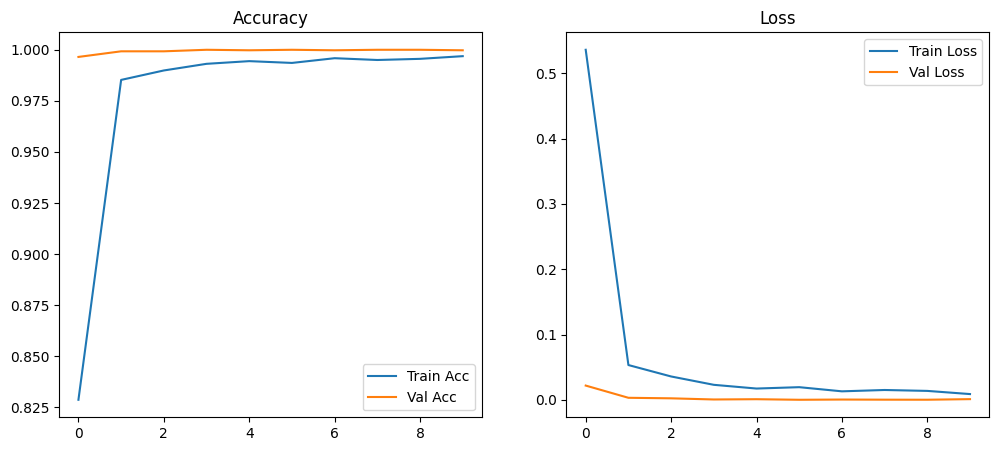

In [7]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss")

plt.show()


In [8]:
# Evaluate Model
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=encoder.classes_))


125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step
               precision    recall  f1-score   support

      01_palm       1.00      1.00      1.00       400
         02_l       1.00      1.00      1.00       400
      03_fist       1.00      1.00      1.00       400
04_fist_moved       1.00      1.00      1.00       400
     05_thumb       1.00      1.00      1.00       400
     06_index       1.00      1.00      1.00       400
        07_ok       1.00      1.00      1.00       400
08_palm_moved       1.00      1.00      1.00       400
         09_c       1.00      1.00      1.00       400
      10_down       1.00      1.00      1.00       400

     accuracy                           1.00      4000
    macro avg       1.00      1.00      1.00      4000
 weighted avg       1.00      1.00      1.00      4000



In [9]:
# Save Model
model.save("hand_gesture_model.h5")
